In [1]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import patches
from pathlib import Path
import pandas as pd
import xarray as xr

%matplotlib inline

In [2]:
import geopandas
from shapely.geometry import Polygon

In [58]:
shapefile_dir = Path('/data/MIDOSS/shapefiles/')
vessel_type = 'barge'
month = '08'
innerdata = geopandas.read_file(shapefile_dir / 
                        f"{vessel_type}_2018_{month}.shp")

In [59]:
innerdata.ST_DATE = pd.to_datetime(innerdata.ST_DATE) #, '%Y-%m-%d %H:%M:%S')
innerdata.EN_DATE = pd.to_datetime(innerdata.EN_DATE)
innerdata

,MMSI_NUM,ST_DATE,EN_DATE,LENGTH,TO,FROM_,geometry
0,316001068.0,2018-08-01 00:09:43,2018-08-01 00:18:03,30,None,None,"LINESTRING (-123.37654 49.11457, -123.34890 49..."
1,316001068.0,2018-08-01 00:18:06,2018-08-01 00:29:21,30,None,None,"LINESTRING (-123.34890 49.10838, -123.30989 49..."
2,316001068.0,2018-08-01 00:29:21,2018-08-01 00:33:22,30,None,None,"LINESTRING (-123.30989 49.10197, -123.29664 49..."
3,316001068.0,2018-08-01 00:33:22,2018-08-01 00:42:44,30,None,None,"LINESTRING (-123.29664 49.10581, -123.26809 49..."
4,316001068.0,2018-08-01 00:42:44,2018-08-01 00:43:43,30,None,None,"LINESTRING (-123.26809 49.11763, -123.26505 49..."
...,...,...,...,...,...,...,...
949018,366866930.0,2018-08-31 23:49:30,2018-08-31 23:50:09,40,Shell Puget Sound Refinery,BP Cherry Point Refinery,"LINESTRING (-123.06398 48.87537, -123.06152 48..."
949019,366866930.0,2018-08-31 23:50:09,2018-08-31 23:53:30,40,Shell Puget Sound Refinery,BP Cherry Point Refinery,"LINESTRING (-123.06152 48.87396, -123.04830 48..."
949020,366866930.0,2018-08-31 23:53:30,2018-08-31 23:55:49,40,Shell Puget Sound Refinery,BP Cherry Point Refinery,"LINESTRING (-123.04830 48.86692, -123.04154 48..."
949021,366866930.0,2018-08-31 23:55:49,2018-08-31 23:57:30,40,Shell Puget Sound Refinery,BP Cherry Point Refinery,"LINESTRING (-123.04154 48.86264, -123.03808 48..."


In [60]:
seaport = innerdata[(innerdata.FROM_ == 'Shell Puget Sound Refinery') & (innerdata.ST_DATE < dt.datetime(2018, 8, 7))
                    & (innerdata.ST_DATE > dt.datetime(2018, 8, 5))]
seaport

,MMSI_NUM,ST_DATE,EN_DATE,LENGTH,TO,FROM_,geometry
325950,366767140.0,2018-08-06 09:51:30,2018-08-06 09:52:06,47,US,Shell Puget Sound Refinery,"LINESTRING (-122.58016 48.51126, -122.57986 48..."
325951,366767140.0,2018-08-06 09:52:06,2018-08-06 09:55:29,47,US,Shell Puget Sound Refinery,"LINESTRING (-122.57986 48.51136, -122.57784 48..."
325952,366767140.0,2018-08-06 09:55:29,2018-08-06 10:00:49,47,US,Shell Puget Sound Refinery,"LINESTRING (-122.57784 48.51174, -122.57981 48..."
325953,366767140.0,2018-08-06 10:00:49,2018-08-06 10:01:49,47,US,Shell Puget Sound Refinery,"LINESTRING (-122.57981 48.51380, -122.58068 48..."
325954,366767140.0,2018-08-06 10:01:49,2018-08-06 10:02:30,47,US,Shell Puget Sound Refinery,"LINESTRING (-122.58068 48.51452, -122.58164 48..."
...,...,...,...,...,...,...,...
944693,366866930.0,2018-08-06 18:28:15,2018-08-06 18:28:37,40,BP Cherry Point Refinery,Shell Puget Sound Refinery,"LINESTRING (-122.76057 48.85210, -122.76058 48..."
944694,366866930.0,2018-08-06 18:28:37,2018-08-06 18:28:56,40,BP Cherry Point Refinery,Shell Puget Sound Refinery,"LINESTRING (-122.76058 48.85221, -122.76061 48..."
944695,366866930.0,2018-08-06 18:28:56,2018-08-06 18:31:56,40,BP Cherry Point Refinery,Shell Puget Sound Refinery,"LINESTRING (-122.76061 48.85232, -122.76147 48..."
944696,366866930.0,2018-08-06 18:31:56,2018-08-06 18:32:55,40,BP Cherry Point Refinery,Shell Puget Sound Refinery,"LINESTRING (-122.76147 48.85448, -122.76193 48..."


In [62]:
seaport.MMSI_NUM.unique().astype(int)

array([366767140, 366887970, 366767150, 366844270, 366866930])

In [57]:
island_monarch = innerdata[innerdata.MMSI_NUM == 366904000]
island_monarch[::30]

,MMSI_NUM,ST_DATE,EN_DATE,LENGTH,TO,FROM_,geometry
3590,366904000.0,2018-08-02 03:43:55,2018-08-02 03:49:31,207,Shell Puget Sound Refinery,Pacific,"LINESTRING (-125.43649 46.80623, -125.43379 46..."
3620,366904000.0,2018-08-02 05:40:31,2018-08-02 05:41:31,207,Shell Puget Sound Refinery,Pacific,"LINESTRING (-125.37384 47.18429, -125.37343 47..."
3650,366904000.0,2018-08-02 08:33:24,2018-08-02 08:33:32,207,Shell Puget Sound Refinery,Pacific,"LINESTRING (-125.33862 47.73916, -125.33860 47..."
3680,366904000.0,2018-08-02 13:55:13,2018-08-02 14:19:12,207,Shell Puget Sound Refinery,Pacific,"LINESTRING (-124.52809 48.40420, -124.42057 48..."
3710,366904000.0,2018-08-02 19:29:33,2018-08-02 20:06:14,207,Shell Puget Sound Refinery,Pacific,"LINESTRING (-123.17988 48.24515, -123.03111 48..."
3740,366904000.0,2018-08-05 17:44:13,2018-08-05 17:45:43,207,SeaPort Sound Terminal,Shell Puget Sound Refinery,"LINESTRING (-122.74862 48.41819, -122.74920 48..."
3770,366904000.0,2018-08-05 19:26:03,2018-08-05 19:26:54,207,SeaPort Sound Terminal,Shell Puget Sound Refinery,"LINESTRING (-122.66418 48.10445, -122.66238 48..."
3800,366904000.0,2018-08-06 21:26:23,2018-08-06 22:46:12,207,Kinder Morgan Liquids Terminal - Harbor Island,SeaPort Sound Terminal,"LINESTRING (-122.37003 47.37462, -122.38161 47..."
3830,366904000.0,2018-08-07 21:24:49,2018-08-07 21:31:14,207,Shell Puget Sound Refinery,Kinder Morgan Liquids Terminal - Harbor Island,"LINESTRING (-122.69526 48.13800, -122.71205 48..."
3860,366904000.0,2018-08-12 23:42:28,2018-08-12 23:43:50,207,US,Shell Puget Sound Refinery,"LINESTRING (-122.88634 48.37574, -122.89140 48..."


In [136]:
def voyage_changes(inner_data, jake):
    diffy = jake[((jake.TO != jake.TO.shift(1)) & ((jake.TO == jake.TO) | (jake.TO.shift(1) == jake.TO.shift(1)))) |
            ((jake.FROM_ != jake.FROM_.shift(1)) & ((jake.FROM_ == jake.FROM_) | (jake.FROM_.shift(1) == jake.FROM_.shift(1))))]
    print(diffy.index)
    gap = []
    for ii in jake.index:
        if innerdata.iloc[ii+1].ST_DATE - innerdata.iloc[ii].EN_DATE > dt.timedelta(hours=4):
            gap.append(ii)
    in_gap = set(gap)
    in_diffy = set(diffy.index)
    changev = (gap + list(in_diffy - in_gap))
    return diffy.index, sorted(changev)

In [4]:
mesh = xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask201702.nc')
tmask = mesh.tmask[0, 0]

In [90]:
innerdata.TO.unique()

array(['Pacific', 'US', 'Shell Puget Sound Refinery', None,
       'Westridge Marine Terminal', 'Canada',
       'Barge Mooring Near Stanovan', 'Chevron Cobble Hill',
       'Chevron Stanovan', 'Suncor Vancouver',
       'Kinder Morgan Liquids Terminal - Harbor Island',
       'SeaPort Sound Terminal', 'Phillips 66 Ferndale Refinery',
       'Marathon Anacortes Refinery (formerly Tesoro)',
       'BP Cherry Point Refinery', 'U.S. Oil & Refining',
       'TLP Management Services LLC (TMS)', 'Shell Shellburn',
       'Suncor Nanaimo', 'ESSO IOCO Vancouver',
       'ESSO Nanaimo Departure Bay'], dtype=object)

In [142]:
cure = innerdata[innerdata.MMSI_NUM == 367770990]
diffy, gap = voyage_changes(innerdata, cure)
cure.count()

Int64Index([], dtype='int64')


MMSI_NUM    4511
ST_DATE     4511
EN_DATE     4511
LENGTH      4511
TO             0
FROM_          0
geometry    4511
dtype: int64

In [139]:
for ii in gap:
    print (f'{ii} Diffy is {ii in diffy}')
    print (cure[cure.index==ii-1].EN_DATE, cure[cure.index==ii-1].TO, cure[cure.index==ii-1].FROM_)
    print (cure[cure.index==ii].ST_DATE, cure[cure.index==ii].TO, cure[cure.index==ii].FROM_)
    print ('----------------------------------------------------------')

0 Diffy is True
Series([], Name: EN_DATE, dtype: datetime64[ns]) Series([], Name: TO, dtype: object) Series([], Name: FROM_, dtype: object)
0   2018-11-01 00:00:34
Name: ST_DATE, dtype: datetime64[ns] 0    Pacific
Name: TO, dtype: object 0    Pacific
Name: FROM_, dtype: object
----------------------------------------------------------
60 Diffy is True
59   2018-11-01 01:08:22
Name: EN_DATE, dtype: datetime64[ns] 59    Pacific
Name: TO, dtype: object 59    Pacific
Name: FROM_, dtype: object
60   2018-11-01 01:08:23
Name: ST_DATE, dtype: datetime64[ns] 60    US
Name: TO, dtype: object 60    Pacific
Name: FROM_, dtype: object
----------------------------------------------------------
715 Diffy is True
714   2018-11-01 14:29:23
Name: EN_DATE, dtype: datetime64[ns] 714    US
Name: TO, dtype: object 714    Pacific
Name: FROM_, dtype: object
715   2018-11-01 14:29:25
Name: ST_DATE, dtype: datetime64[ns] 715    Shell Puget Sound Refinery
Name: TO, dtype: object 715    US
Name: FROM_, dtype: ob

In [34]:
for (index, row) in cure[cure.MMSI_NUM == 367183360].iterrows():
    if (dt.datetime.strptime(row.ST_DATE, '%Y-%m-%d %H:%M:%S') < dt.datetime(2018, 8, 6)):
        print (row)

In [92]:
cure

,MMSI_NUM,ST_DATE,EN_DATE,LENGTH,TO,FROM_,geometry
0,303668000.0,2018-11-01 00:00:34,2018-11-01 00:02:05,206,Pacific,Pacific,"LINESTRING (-125.66544 47.40737, -125.66544 47..."
1,303668000.0,2018-11-01 00:02:05,2018-11-01 00:05:05,206,Pacific,Pacific,"LINESTRING (-125.66544 47.41218, -125.66568 47..."
2,303668000.0,2018-11-01 00:05:05,2018-11-01 00:05:21,206,Pacific,Pacific,"LINESTRING (-125.66568 47.42166, -125.66500 47..."
3,303668000.0,2018-11-01 00:05:22,2018-11-01 00:05:45,206,Pacific,Pacific,"LINESTRING (-125.66500 47.42167, -125.66569 47..."
4,303668000.0,2018-11-01 00:05:45,2018-11-01 00:06:05,206,Pacific,Pacific,"LINESTRING (-125.66569 47.42374, -125.66571 47..."
...,...,...,...,...,...,...,...
6272,303668000.0,2018-11-20 04:47:59,2018-11-20 04:48:15,206,Pacific,Pacific,"LINESTRING (-125.69667 46.80833, -125.69718 46..."
6273,303668000.0,2018-11-20 04:48:15,2018-11-20 04:48:36,206,Pacific,Pacific,"LINESTRING (-125.69718 46.80752, -125.69718 46..."
6274,303668000.0,2018-11-20 04:48:36,2018-11-20 04:49:35,206,Pacific,Pacific,"LINESTRING (-125.69718 46.80651, -125.69720 46..."
6275,303668000.0,2018-11-20 04:49:35,2018-11-20 04:50:15,206,Pacific,Pacific,"LINESTRING (-125.69720 46.80351, -125.69723 46..."


<ipython-input-100-aee58bf9684a>:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(mesh.nav_lon, mesh.nav_lat, tmask)


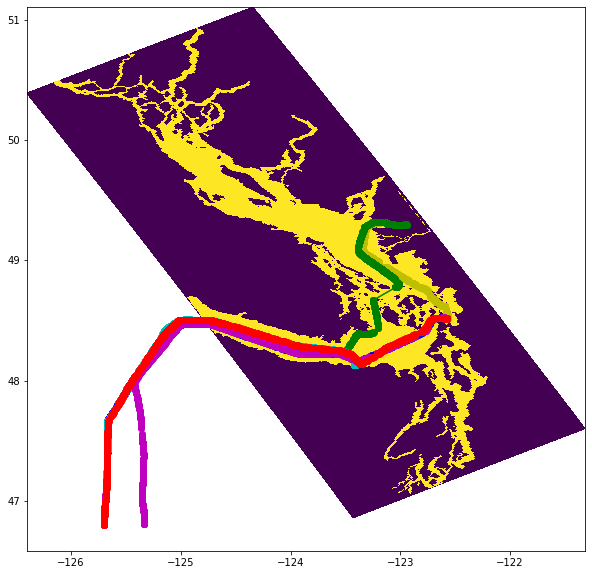

In [100]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.pcolormesh(mesh.nav_lon, mesh.nav_lat, tmask)
for jj, (index, row) in enumerate(cure.iterrows()):
    if jj < 1000:
        ax.plot([row.geometry.coords[0][0],
              row.geometry.coords[1][0]],
             [row.geometry.coords[0][1],
              row.geometry.coords[1][1]], 'bo-')
    elif jj < 2000:
        ax.plot([row.geometry.coords[0][0],
              row.geometry.coords[1][0]],
             [row.geometry.coords[0][1],
              row.geometry.coords[1][1]], 'yo-')
    elif jj < 3000:
        ax.plot([row.geometry.coords[0][0],
              row.geometry.coords[1][0]],
             [row.geometry.coords[0][1],
              row.geometry.coords[1][1]], 'go-')
    elif jj < 4000:
        ax.plot([row.geometry.coords[0][0],
              row.geometry.coords[1][0]],
             [row.geometry.coords[0][1],
              row.geometry.coords[1][1]], 'co-')
    elif jj < 5000:
        ax.plot([row.geometry.coords[0][0],
              row.geometry.coords[1][0]],
             [row.geometry.coords[0][1],
              row.geometry.coords[1][1]], 'mo-')
    else:
        ax.plot([row.geometry.coords[0][0],
              row.geometry.coords[1][0]],
             [row.geometry.coords[0][1],
              row.geometry.coords[1][1]], 'ro-')

 


In [94]:
cure.TO.drop_duplicates()

0                          Pacific
60                              US
715     Shell Puget Sound Refinery
834                           None
1614     Westridge Marine Terminal
Name: TO, dtype: object

In [95]:
cure.FROM_.unique()

array(['Pacific', 'US', 'Shell Puget Sound Refinery', None,
       'Westridge Marine Terminal'], dtype=object)

On November 1, Gulf Reliance comes in to Shell Puget Sound with the Edward Itta for gasoline.  In Shell, shell shell x5, then off to Westridge.
On November 16, Gulf Reliance comes into Shell Puget with 650-2 for bunker/cat feed etc from US.  Into Shell, shell shell, then off to Pacific
The MinZidell which "usually" pushes the Itta has no linked tracks in November.

In [144]:
cure

,MMSI_NUM,ST_DATE,EN_DATE,LENGTH,TO,FROM_,geometry
57325,367770990.0,2018-11-01 00:17:30,2018-11-01 00:20:30,38,None,None,"LINESTRING (-122.42333 47.29167, -122.42500 47..."
57326,367770990.0,2018-11-01 00:53:19,2018-11-01 00:53:31,38,None,None,"LINESTRING (-122.42479 47.29198, -122.42333 47..."
57327,367770990.0,2018-11-01 01:23:36,2018-11-01 01:29:30,38,None,None,"LINESTRING (-122.42333 47.29167, -122.42167 47..."
57328,367770990.0,2018-11-01 01:50:30,2018-11-01 01:53:30,38,None,None,"LINESTRING (-122.42167 47.29167, -122.42333 47..."
57329,367770990.0,2018-11-01 02:41:24,2018-11-01 02:41:31,38,None,None,"LINESTRING (-122.42371 47.29203, -122.42333 47..."
...,...,...,...,...,...,...,...
61831,367770990.0,2018-11-30 22:20:48,2018-11-30 22:21:36,38,None,None,"LINESTRING (-122.34333 47.57333, -122.34340 47..."
61832,367770990.0,2018-11-30 22:21:36,2018-11-30 22:23:47,38,None,None,"LINESTRING (-122.34340 47.57396, -122.34333 47..."
61833,367770990.0,2018-11-30 22:26:47,2018-11-30 22:27:36,38,None,None,"LINESTRING (-122.34333 47.57333, -122.34344 47..."
61834,367770990.0,2018-11-30 22:27:36,2018-11-30 22:29:47,38,None,None,"LINESTRING (-122.34344 47.57395, -122.34333 47..."


In [88]:
jake.TO.drop_duplicates()

26118                                              None
26168    Kinder Morgan Liquids Terminal - Harbor Island
26171                                           Pacific
26898                                                US
Name: TO, dtype: object

In [87]:
jake = innerdata[innerdata.MMSI_NUM == 367740790]

jake[0::100]

,MMSI_NUM,ST_DATE,EN_DATE,LENGTH,TO,FROM_,geometry
26118,367740790.0,2018-05-02 11:18:52,2018-05-02 11:19:02,34,None,None,"LINESTRING (-122.34333 47.57333, -122.34348 47..."
26218,367740790.0,2018-05-12 01:02:10,2018-05-12 01:03:48,34,Pacific,US,"LINESTRING (-122.43333 47.73500, -122.43235 47..."
26318,367740790.0,2018-05-12 04:11:28,2018-05-12 04:17:10,34,Pacific,US,"LINESTRING (-122.78984 48.19343, -122.81167 48..."
26418,367740790.0,2018-05-12 07:57:37,2018-05-12 07:59:11,34,Pacific,US,"LINESTRING (-123.59327 48.19397, -123.59833 48..."
26518,367740790.0,2018-05-12 11:48:29,2018-05-12 11:49:29,34,Pacific,US,"LINESTRING (-124.41736 48.34232, -124.42100 48..."
26618,367740790.0,2018-05-12 14:14:13,2018-05-12 14:17:11,34,Pacific,US,"LINESTRING (-124.93333 48.42833, -124.93833 48..."
26718,367740790.0,2018-05-12 18:31:47,2018-05-12 18:32:12,34,Pacific,US,"LINESTRING (-125.27740 47.82856, -125.27667 47..."
26818,367740790.0,2018-05-12 23:22:18,2018-05-12 23:23:08,34,Pacific,US,"LINESTRING (-125.27409 47.06874, -125.27408 47..."
26918,367740790.0,2018-05-26 21:22:18,2018-05-26 21:22:40,34,US,Pacific,"LINESTRING (-124.83551 46.86572, -124.83587 46..."
27018,367740790.0,2018-05-26 23:14:49,2018-05-26 23:15:50,34,US,Pacific,"LINESTRING (-124.94097 47.13403, -124.94174 47..."


In [118]:
shapefile_dir = Path('/data/MIDOSS/shapefiles/')
vessel_type = 'atb'
month = '08'
innerdata = geopandas.read_file(shapefile_dir / 
                        f"{vessel_type}_2018_{month}.shp")

In [120]:
cure = innerdata[innerdata.MMSI_NUM == 368006870]
cure

,MMSI_NUM,ST_DATE,EN_DATE,LENGTH,TO,FROM_,geometry
11232,368006870.0,2018-08-01 00:01:26,2018-08-01 00:10:26,178,Pacific,Canada,"LINESTRING (-127.07333 50.73667, -127.10333 50..."
11233,368006870.0,2018-08-01 00:10:26,2018-08-01 00:28:25,178,Pacific,Canada,"LINESTRING (-127.10333 50.74500, -127.16667 50..."
11234,368006870.0,2018-08-01 00:28:25,2018-08-01 00:34:21,178,Pacific,Canada,"LINESTRING (-127.16667 50.76000, -127.18778 50..."
11235,368006870.0,2018-08-01 00:34:21,2018-08-01 00:34:26,178,Pacific,Canada,"LINESTRING (-127.18778 50.76443, -127.18667 50..."
11236,368006870.0,2018-08-01 00:34:26,2018-08-01 00:43:26,178,Pacific,Canada,"LINESTRING (-127.18667 50.76333, -127.22000 50..."
...,...,...,...,...,...,...,...
16736,368006870.0,2018-08-31 19:09:29,2018-08-31 19:09:50,178,None,None,"LINESTRING (-122.57667 48.50833, -122.57807 48..."
16737,368006870.0,2018-08-31 19:09:50,2018-08-31 19:12:27,178,None,None,"LINESTRING (-122.57807 48.50954, -122.57667 48..."
16738,368006870.0,2018-08-31 19:12:28,2018-08-31 19:12:52,178,None,None,"LINESTRING (-122.57667 48.50833, -122.57807 48..."
16739,368006870.0,2018-08-31 19:12:52,2018-08-31 19:15:28,178,None,None,"LINESTRING (-122.57807 48.50958, -122.57667 48..."


<ipython-input-121-12e71f75810b>:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(mesh.nav_lon, mesh.nav_lat, tmask)


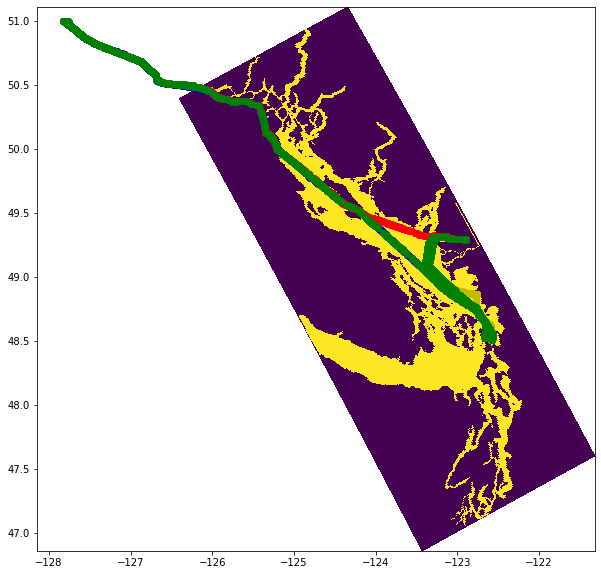

In [121]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.pcolormesh(mesh.nav_lon, mesh.nav_lat, tmask)
for jj, (index, row) in enumerate(cure.iterrows()):
    if jj < 1000:
        ax.plot([row.geometry.coords[0][0],
              row.geometry.coords[1][0]],
             [row.geometry.coords[0][1],
              row.geometry.coords[1][1]], 'bo-')
    elif jj < 2000:
        ax.plot([row.geometry.coords[0][0],
              row.geometry.coords[1][0]],
             [row.geometry.coords[0][1],
              row.geometry.coords[1][1]], 'yo-')
    elif jj > 3000:
        ax.plot([row.geometry.coords[0][0],
              row.geometry.coords[1][0]],
             [row.geometry.coords[0][1],
              row.geometry.coords[1][1]], 'go-')
    elif jj > 4000:
        ax.plot([row.geometry.coords[0][0],
              row.geometry.coords[1][0]],
             [row.geometry.coords[0][1],
              row.geometry.coords[1][1]], 'co-')
    elif jj > 5000:
        ax.plot([row.geometry.coords[0][0],
              row.geometry.coords[1][0]],
             [row.geometry.coords[0][1],
              row.geometry.coords[1][1]], 'mo-')
    else:
        ax.plot([row.geometry.coords[0][0],
              row.geometry.coords[1][0]],
             [row.geometry.coords[0][1],
              row.geometry.coords[1][1]], 'ro-')

In [142]:
cure[cure.TO != cure.TO].count()

MMSI_NUM    563
ST_DATE     563
EN_DATE     563
LENGTH      563
TO            0
FROM_         0
geometry    563
dtype: int64

In [174]:
# Suncor Vancouver (36)
# Westridge Marine Terminal (19)
# Shell Puget Sound Refinery(358)
# BP Cherry Point Refinery (471)
cure.iloc[300::500].TO

11532                       Pacific
12032      BP Cherry Point Refinery
12532                          None
13032                        Canada
13532                        Canada
14032                       Pacific
14532                       Pacific
15032                       Pacific
15532                            US
16032                        Canada
16532    Shell Puget Sound Refinery
Name: TO, dtype: object

In [165]:
2094+798+1170+563+471+19+358+36

5509

In [190]:
cure[cure.TO == 'BP Cherry Point Refinery'][500:100:5]

,MMSI_NUM,ST_DATE,EN_DATE,LENGTH,TO,FROM_,geometry


In [206]:
# Suncor Vancouver 19
# BP Cherry Point Refinery 107
# Chevron Stanovan 277
# Shell Puget Sound Refinery 572
cure[cure.FROM_ == 'Chevron Stanovan'].count()

MMSI_NUM    277
ST_DATE     277
EN_DATE     277
LENGTH      277
TO          277
FROM_       277
geometry    277
dtype: int64

In [207]:
563+2310+511+1150+572+107+19+277

5509

In [215]:
cure[cure.FROM_ == 'Shell Puget Sound Refinery'][500:750:5]

,MMSI_NUM,ST_DATE,EN_DATE,LENGTH,TO,FROM_,geometry
13379,368006870.0,2018-08-11 19:01:42,2018-08-11 19:02:23,178,Canada,Shell Puget Sound Refinery,"LINESTRING (-123.15231 49.31664, -123.15039 49..."
13384,368006870.0,2018-08-11 19:03:23,2018-08-11 19:04:12,178,Canada,Shell Puget Sound Refinery,"LINESTRING (-123.14781 49.31634, -123.14551 49..."
13389,368006870.0,2018-08-11 19:05:58,2018-08-11 19:06:22,178,Canada,Shell Puget Sound Refinery,"LINESTRING (-123.14112 49.31555, -123.14035 49..."
13394,368006870.0,2018-08-11 19:18:18,2018-08-11 19:21:19,178,Canada,Shell Puget Sound Refinery,"LINESTRING (-123.11167 49.30167, -123.10167 49..."
13399,368006870.0,2018-08-11 19:39:18,2018-08-11 19:39:34,178,Canada,Shell Puget Sound Refinery,"LINESTRING (-123.04667 49.29500, -123.04605 49..."
13404,368006870.0,2018-08-11 19:57:19,2018-08-11 20:00:18,178,Canada,Shell Puget Sound Refinery,"LINESTRING (-123.00333 49.29500, -123.00000 49..."
16664,368006870.0,2018-08-31 00:53:18,2018-08-31 00:54:27,178,Shell Puget Sound Refinery,Shell Puget Sound Refinery,"LINESTRING (-122.58122 48.51811, -122.58000 48..."
16669,368006870.0,2018-08-31 01:12:27,2018-08-31 01:15:32,178,Shell Puget Sound Refinery,Shell Puget Sound Refinery,"LINESTRING (-122.57667 48.51833, -122.57333 48..."
16674,368006870.0,2018-08-31 01:27:28,2018-08-31 01:30:28,178,Shell Puget Sound Refinery,Shell Puget Sound Refinery,"LINESTRING (-122.56833 48.51500, -122.56833 48..."
16679,368006870.0,2018-08-31 01:54:28,2018-08-31 01:57:06,178,Shell Puget Sound Refinery,Shell Puget Sound Refinery,"LINESTRING (-122.57167 48.51333, -122.57191 48..."


In [222]:
cure.iloc[2500:3000:10]

,MMSI_NUM,ST_DATE,EN_DATE,LENGTH,TO,FROM_,geometry
13732,368006870.0,2018-08-12 17:09:20,2018-08-12 17:09:33,178,Pacific,Canada,"LINESTRING (-124.36167 49.56167, -124.36358 49..."
13742,368006870.0,2018-08-12 17:23:52,2018-08-12 17:24:18,178,Pacific,Canada,"LINESTRING (-124.39407 49.57232, -124.39333 49..."
13752,368006870.0,2018-08-12 17:45:18,2018-08-12 17:46:33,178,Pacific,Canada,"LINESTRING (-124.43333 49.59000, -124.43709 49..."
13762,368006870.0,2018-08-12 18:16:31,2018-08-12 18:17:11,178,Pacific,Canada,"LINESTRING (-124.48836 49.62153, -124.48951 49..."
13772,368006870.0,2018-08-12 18:25:51,2018-08-12 18:27:18,178,Pacific,Canada,"LINESTRING (-124.50432 49.63094, -124.50667 49..."
13782,368006870.0,2018-08-12 18:40:11,2018-08-12 18:40:31,178,Pacific,Canada,"LINESTRING (-124.52809 49.64620, -124.52863 49..."
13792,368006870.0,2018-08-12 18:45:12,2018-08-12 18:45:19,178,Pacific,Canada,"LINESTRING (-124.53716 49.65079, -124.53667 49..."
13802,368006870.0,2018-08-12 18:47:30,2018-08-12 18:47:52,178,Pacific,Canada,"LINESTRING (-124.54159 49.65284, -124.54227 49..."
13812,368006870.0,2018-08-12 18:57:19,2018-08-12 18:59:11,178,Pacific,Canada,"LINESTRING (-124.56000 49.66000, -124.56402 49..."
13822,368006870.0,2018-08-12 19:39:18,2018-08-12 19:42:12,178,Pacific,Canada,"LINESTRING (-124.63833 49.70167, -124.64443 49..."


In [257]:
cure = innerdata[innerdata.MMSI_NUM == 367740790]
cure[5800:6100:5]

,MMSI_NUM,ST_DATE,EN_DATE,LENGTH,TO,FROM_,geometry
32078,367740790.0,2018-08-31 02:16:27,2018-08-31 02:17:27,34,US,US,"LINESTRING (-122.76004 48.15926, -122.75648 48..."
32083,367740790.0,2018-08-31 02:19:27,2018-08-31 02:26:08,34,US,US,"LINESTRING (-122.74922 48.15335, -122.72781 48..."
32088,367740790.0,2018-08-31 02:33:07,2018-08-31 02:33:18,34,US,US,"LINESTRING (-122.70460 48.12608, -122.70395 48..."
32093,367740790.0,2018-08-31 02:35:58,2018-08-31 02:37:05,34,US,US,"LINESTRING (-122.69447 48.11980, -122.69000 48..."
32098,367740790.0,2018-08-31 02:43:05,2018-08-31 02:43:08,34,US,US,"LINESTRING (-122.66833 48.10333, -122.66914 48..."
32103,367740790.0,2018-08-31 02:46:16,2018-08-31 02:49:05,34,US,US,"LINESTRING (-122.66470 48.09600, -122.66167 48..."
32108,367740790.0,2018-08-31 02:55:48,2018-08-31 02:56:07,34,TLP Management Services LLC (TMS),US,"LINESTRING (-122.65897 48.07527, -122.65882 48..."
32113,367740790.0,2018-08-31 03:03:27,2018-08-31 03:04:04,34,TLP Management Services LLC (TMS),US,"LINESTRING (-122.65526 48.05810, -122.65333 48..."
32118,367740790.0,2018-08-31 03:23:18,2018-08-31 03:23:58,34,TLP Management Services LLC (TMS),US,"LINESTRING (-122.63154 48.01118, -122.63026 48..."
32123,367740790.0,2018-08-31 03:36:08,2018-08-31 03:36:47,34,TLP Management Services LLC (TMS),US,"LINESTRING (-122.60708 47.98022, -122.60574 47..."


In [63]:
cure = innerdata[innerdata.MMSI_NUM == 369580000]
cure.TO.unique()

array(['US', 'Kinder Morgan Liquids Terminal - Harbor Island',
       'Phillips 66 Ferndale Refinery'], dtype=object)

<ipython-input-64-12e71f75810b>:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(mesh.nav_lon, mesh.nav_lat, tmask)


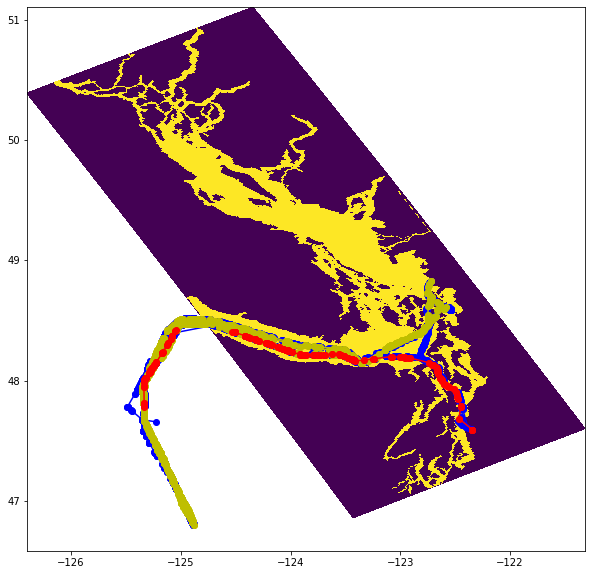

In [64]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.pcolormesh(mesh.nav_lon, mesh.nav_lat, tmask)
for jj, (index, row) in enumerate(cure.iterrows()):
    if jj < 1000:
        ax.plot([row.geometry.coords[0][0],
              row.geometry.coords[1][0]],
             [row.geometry.coords[0][1],
              row.geometry.coords[1][1]], 'bo-')
    elif jj < 2000:
        ax.plot([row.geometry.coords[0][0],
              row.geometry.coords[1][0]],
             [row.geometry.coords[0][1],
              row.geometry.coords[1][1]], 'yo-')
    elif jj > 3000:
        ax.plot([row.geometry.coords[0][0],
              row.geometry.coords[1][0]],
             [row.geometry.coords[0][1],
              row.geometry.coords[1][1]], 'go-')
    elif jj > 4000:
        ax.plot([row.geometry.coords[0][0],
              row.geometry.coords[1][0]],
             [row.geometry.coords[0][1],
              row.geometry.coords[1][1]], 'co-')
    elif jj > 5000:
        ax.plot([row.geometry.coords[0][0],
              row.geometry.coords[1][0]],
             [row.geometry.coords[0][1],
              row.geometry.coords[1][1]], 'mo-')
    else:
        ax.plot([row.geometry.coords[0][0],
              row.geometry.coords[1][0]],
             [row.geometry.coords[0][1],
              row.geometry.coords[1][1]], 'ro-')

In [67]:
cure[0:400:10]

,MMSI_NUM,ST_DATE,EN_DATE,LENGTH,TO,FROM_,geometry
18876,369580000.0,2018-08-02 18:59:25,2018-08-02 20:13:23,172,US,Phillips 66 Ferndale Refinery,"LINESTRING (-122.72122 48.82549, -122.74614 48..."
18886,369580000.0,2018-08-03 02:12:05,2018-08-03 02:18:06,172,US,Phillips 66 Ferndale Refinery,"LINESTRING (-123.99204 48.31294, -124.01808 48..."
18896,369580000.0,2018-08-03 06:19:06,2018-08-03 06:25:05,172,US,Phillips 66 Ferndale Refinery,"LINESTRING (-125.09293 48.44082, -125.11154 48..."
18906,369580000.0,2018-08-03 13:20:45,2018-08-03 14:46:24,172,US,Phillips 66 Ferndale Refinery,"LINESTRING (-125.04952 47.13697, -124.92199 46..."
18916,369580000.0,2018-08-06 08:53:52,2018-08-06 09:38:48,172,US,US,"LINESTRING (-125.32485 47.65283, -125.33008 47..."
18926,369580000.0,2018-08-10 21:21:29,2018-08-10 21:22:59,172,US,US,"LINESTRING (-122.54462 48.58966, -122.54381 48..."
18936,369580000.0,2018-08-11 06:02:28,2018-08-11 06:03:28,172,Kinder Morgan Liquids Terminal - Harbor Island,US,"LINESTRING (-122.54558 48.59319, -122.54837 48..."
18946,369580000.0,2018-08-11 06:48:50,2018-08-11 06:51:10,172,Kinder Morgan Liquids Terminal - Harbor Island,US,"LINESTRING (-122.67467 48.54257, -122.68172 48..."
18956,369580000.0,2018-08-11 07:26:50,2018-08-11 07:28:51,172,Kinder Morgan Liquids Terminal - Harbor Island,US,"LINESTRING (-122.74512 48.42144, -122.74604 48..."
18966,369580000.0,2018-08-11 08:02:10,2018-08-11 08:03:30,172,Kinder Morgan Liquids Terminal - Harbor Island,US,"LINESTRING (-122.78216 48.30767, -122.78417 48..."
